In [31]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import unicodedata
from nltk.corpus import stopwords
import nltk
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None)

In [2]:
import oliver_acquire as a

In [3]:
#s = a.fetch_github_repos(20)

In [4]:
#data = pd.DataFrame(s)

In [5]:
scrape = a.scrape_github_data()

In [6]:
data = pd.DataFrame(scrape)

In [7]:
data.to_csv('git_url.csv')

In [8]:
df = pd.read_csv('git_url.csv', index_col=0)

In [9]:
df

,repo,language,readme_contents
0,jtleek/datasharing,NaN,How to share data with a statistician\n=======...
1,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
2,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
3,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...
4,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
5,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."
6,LSPosed/MagiskOnWSA,NaN,# Magisk on WSA (with Google Apps)\n\n## Featu...
7,github/gitignore,NaN,# A collection of `.gitignore` templates\n\nTh...
8,Pierian-Data/Complete-Python-3-Bootcamp,Jupyter Notebook,# Complete-Python-3-Bootcamp\nCourse Files for...
9,jwasham/coding-interview-university,NaN,# Coding Interview University\n\n> I originall...


In [13]:
#change jupyter notebook to python
df['language'].replace('Jupyter Notebook', 'Python', inplace=True )

In [14]:
def top_n_target(df,target,  n):
    '''
    takes in a df and target and give you the top n of you target
    return a df with only the top n 
    '''
    
    #get the value counts of the target
    targ =pd.DataFrame(df[[target]].value_counts())\
    .reset_index().rename(columns= {0:'cnt', 'index':target})
    #get the top 5
    topl= list(targ.loc[0:(n-1)].language.values)
    #get new df with only the top n values of target
    df= df[df.language.isin(topl)].reset_index(drop=True)
    return  df

In [17]:
df = top_n_target(df, 'language', 3)

In [18]:
df.language.value_counts()

Python        37
Java          28
JavaScript    26
Name: language, dtype: int64

In [25]:
def basic_clean (string):
    '''
    takes in a string and lowercase everything, normalize unicode characters, replace anything that is not a letter,
    number, whitespace or a single quote.
    retunr a clean string
    '''
    
    string = string.lower()
    string = unicodedata.normalize('NFKC',string)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')
    string = re.sub(r"\w*.?\w*@\w*.com", '', string)
    string = re.sub(r"[^a-z0-9\s]", '', string)
    string = re.sub(r'\w*http\w*', '', string)
    string = re.sub(r'\w*github\w*', '', string)
    string = re.sub(r'\w*html\w*', '', string)
    string = re.sub(r'\w*gmail\w*', '', string)
    string = re.sub(r'\w*\n\w*', '', string)

    return string

In [22]:
def tokenize (string):
    '''
    take in a string and tokenize all the words in the string
    '''
    
    # Create the tokenizer
    tokenizer = nltk.tokenize.ToktokTokenizer()
    # Use the tokenizer
    string = tokenizer.tokenize(string, return_str = True)
    return string


def stem (string):
    '''
     takes in a text and return the text after applying stemming to all the words.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    # Apply the stemmer to each word in our string.
    stems = [ps.stem(word) for word in string.split()]
    text_stemmed = ' '.join(stems)
    return text_stemmed 



def lemmatize (text):
    '''
     Takes in some text and return the text after applying lemmatization to each word.
    '''
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in text.split()]
    
    # Join our list of words into a string again; assign to a variable to save changes.
    text_lemmatized = ' '.join(lemmas)
    
    return text_lemmatized
    


def remove_stopwords (string, extra_words= [], exclude_words=[]):
    '''
    Takes in a strand return the text after removing all the stopwords.
    Parameters:
    string : text in  string type
    extra_words : list of additional stop words to include,
    exclude_words : list of any words that we don't want to remove.
    '''
    # standard English language stopwords list from nltk
    stopword_list = stopwords.words('english')
    
    #add extra_words
    stopword_list =stopword_list + extra_words
    
    #exclude words
    for element in exclude_words:
        if element in stopword_list:
            stopword_list.remove(element)
    # Split words.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings; assign to a variable to keep changes.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

In [23]:
def prepare_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the  original text, cleaned (tokenized and stopwords removed) , stemmed text,
    lemmatized text.
    '''
    df['clean'] = df[column].apply(basic_clean)\
                            .apply(tokenize)\
                            .apply(remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(stem)
    
    df['lemmatized'] = df['clean'].apply(lemmatize)
    
    return df

In [32]:
#clean, tokenized, stemming, lemmatize
df = prepare_data(df,'readme_contents')

In [33]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p img altbootstrap logo width200 sleek intuiti...,p img altbootstrap logo width200 sleek intuit ...,p img altbootstrap logo width200 sleek intuiti...
1,Pierian-Data/Complete-Python-3-Bootcamp,Python,# Complete-Python-3-Bootcamp\nCourse Files for...,files complete python 3 bootcamp course pieria...,file complet python 3 bootcamp cours pierian d...,file complete python 3 bootcamp course pierian...
2,github/docs,JavaScript,# GitHub Docs <!-- omit in toc --> \n\nThis re...,docs omit toc repository contains documentatio...,doc omit toc repositori contain document websi...,doc omit toc repository contains documentation...
3,eugenp/tutorials,Java,The Courses\n==============================\n\...,new learn spring course learn spring master ma...,new learn spring cours learn spring master mas...,new learn spring course learn spring master ma...
4,tensorflow/models,Python,"<div align=""center"">\n <img src=""https://stor...",div img welcome model garden tensorflow model ...,div img welcom model garden tensorflow model g...,div img welcome model garden tensorflow model ...


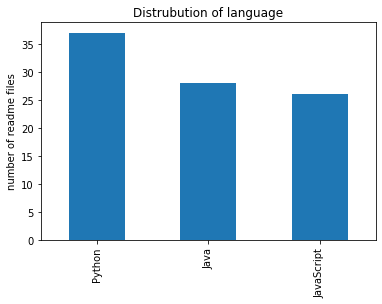

In [34]:
df.language.value_counts().plot.bar()
plt.title('Distrubution of language')
plt.ylabel('number of readme files')
plt.show()

# What are the most common words in READMEs?

In [35]:
#get the list of languages
list_lang = list(df.language.value_counts().index)

In [37]:
#joint all the text of each language
join_text ={}
for language in list_lang :
    join_text[language] = basic_clean(' '.join(df[df.language == language].lemmatized))

#add allwords
join_text['all_words']= basic_clean(' '.join(df.lemmatized))

In [38]:
#check if we have all the languages
join_text.keys()

dict_keys(['Python', 'Java', 'JavaScript', 'all_words'])

In [39]:
#Represent text as word frequencies.
#create a word_count df 
word_counts= pd.DataFrame()
for lang in join_text:
    word_counts[lang] = pd.Series(join_text[lang].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [40]:
word_counts.sort_values('all_words', ascending=False).head()

,Python,Java,JavaScript,all_words
yes,1738,0,0,1738
unknown,911,0,0,911
data,668,32,28,728
apikey,595,0,4,599
python,477,0,1,478


<Figure size 720x576 with 0 Axes>

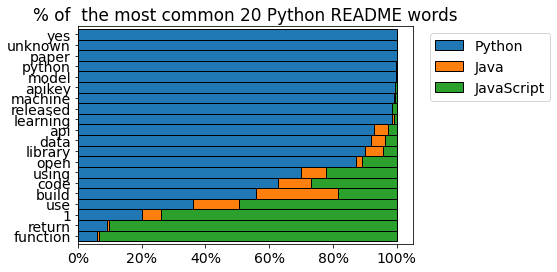

<Figure size 720x576 with 0 Axes>

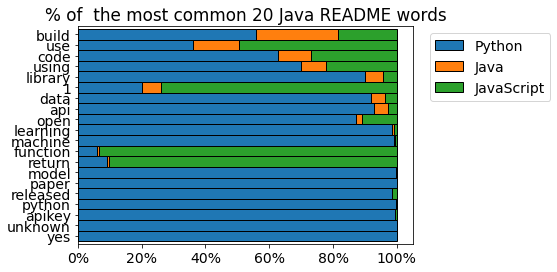

<Figure size 720x576 with 0 Axes>

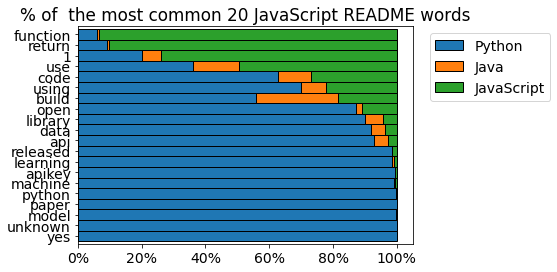

In [50]:
#most common words sorted by each language
for column in word_counts.drop(columns='all_words'):
    plt.figure(figsize=(10, 8))
    plt.rc('font', size=14)
    # axis=1 in .apply means row by row
    (word_counts.sort_values(by='all_words', ascending=False)
     .head(20)
     .apply(lambda row: row / row['all_words'], axis=1)
     .drop(columns='all_words')
     .sort_values(by= column)
     .plot.barh(stacked=True, width=1, ec='black'))
    plt.title(f'% of  the most common 20 {column} README words')
    plt.legend(bbox_to_anchor= (1.03,1))

    plt.gca().xaxis.set_major_formatter(mpl.ticker.FuncFormatter('{:.0%}'.format))
    plt.show()